In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

Python 3.7.12


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

# scipy : SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. 
#         It adds significant power to the interactive Python session by providing the user with high-level commands and classes 
#         for manipulating and visualizing data. 
#   About: https://docs.scipy.org/doc/scipy/index.html 
#   scipy.stats.norm: A normal continuous random variable -> scipy.stats.norm(x,loc=0,scale=0)
#                   : The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

numpy version: 1.19.5
pandas version:  1.1.5
seaborn version: 0.11.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


# [Outlier detection with Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)

**Source**: https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

## Generate data

In [3]:
# fix randomness 
#np.random.seed(101)
# Generate random data 
data_points=np.random.randn(100,2)
# print min and max of data
print('Initial shape:',data_points.shape)
print('Initial max:',data_points.max())
print('Initial min:',data_points.min())
data_points=np.r_[data_points+2,data_points-2]
# look more into the data 
print('Initial shape:',data_points.shape)
print('Initial max:',data_points.max())
print('Initial min:',data_points.min())

Initial shape: (100, 2)
Initial max: 2.6643633618262426
Initial min: -2.2077356804270627
Initial shape: (200, 2)
Initial max: 4.664363361826243
Initial min: -4.207735680427063


## Add outliers to data

In [4]:
# number of outliers to generate 
n_outliers_points=25
# add outliers to data (generated)
data_points_with_outliers=np.random.uniform(low=4,high=-4,size=(n_outliers_points,2))
# make final data 
X=np.r_[data_points,data_points_with_outliers]
print('Initial shape:',X.shape)
print('Initial max:',X.max())
print('Initial min:',X.min())

Initial shape: (225, 2)
Initial max: 4.664363361826243
Initial min: -4.207735680427063


## Add labels to data

In [5]:
# labels / outliers label
y=np.ones(len(X),dtype=int)
y[-n_outliers_points:]=-1

## Make model - [sklearn.neighbors.LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

In [6]:
# load LOF 
from sklearn.neighbors import LocalOutlierFactor
# make the model 
outliers_dectector_=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
# train detector and predict outputs / outliers 
y_predict=outliers_dectector_.fit_predict(X)

In [7]:
# count number of error / wrong predictions 
(y_predict!=y).sum()

24

In [8]:
# accuracy (%)
round((y_predict==y).sum()/len(y)*100,2)

89.33

## Plot results 

In [9]:
# calculate model score for each point 
scores=outliers_dectector_.negative_outlier_factor_
# noramlize the score (between 0 and 1)
scores=(scores.max()-scores)/(scores.max()-scores.min())
# print range of scores 
print('Scores are in between:',scores.max(),'and',scores.min())

Scores are in between: 1.0 and 0.0


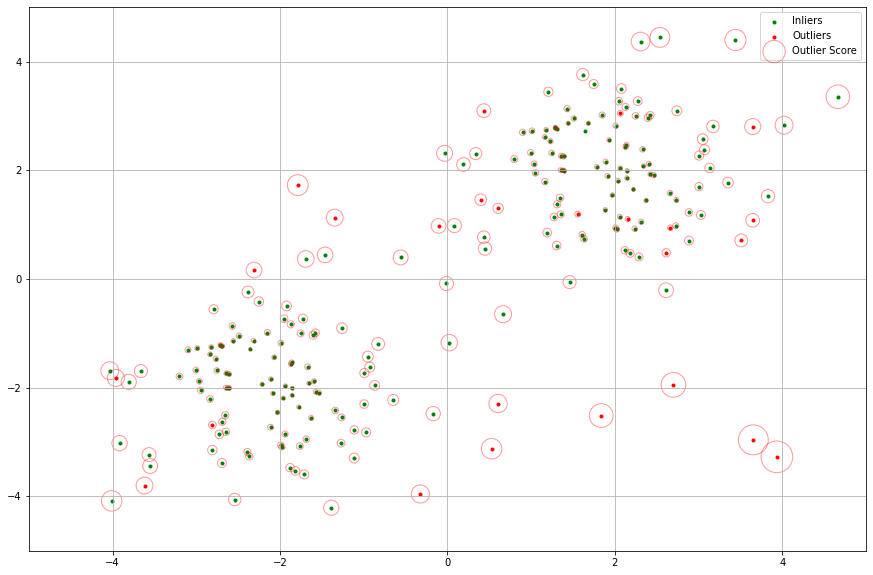

In [10]:
# make figure 
plt.figure(figsize=(15,10))
# plot grid
plt.grid()
# make plot of data 
plt.scatter(X[y==1,0],X[y==1,1],label='Inliers',marker='.',color='green')
plt.scatter(X[y==-1,0],X[y==-1,1],label='Outliers',marker='.',color='red')
# plot data points scores 
plt.scatter(X[:,0],X[:,1],s=1000*scores,edgecolors='r',facecolors='none',
            label='Outlier Score',alpha=0.4)
plt.axis('tight'),plt.xlim((-5,5)),plt.ylim((-5,5)),plt.legend(),plt.axis()
plt.show()

## Selecting threshold 

### Graphical Method - Box n Whisker Plot 

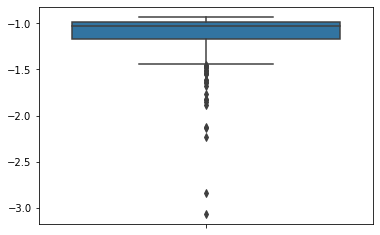

In [19]:
# Read here - https://en.wikipedia.org/wiki/Box_plot
# make Box plot 
sns.boxplot(y=outliers_dectector_.negative_outlier_factor_);

In [22]:
# scale values 
from sklearn.preprocessing import StandardScaler

# get values 
factor_=outliers_dectector_.negative_outlier_factor_
# make scaler object 
scaler_=StandardScaler()
# fit and transform / make data scale 
factor_=scaler_.fit_transform(factor_.reshape(-1,1))

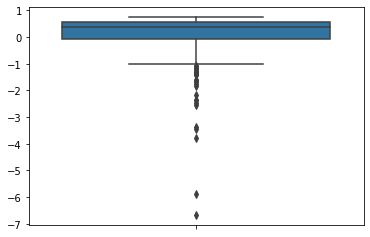

In [23]:
# make Box plot (after scaling)
sns.boxplot(y=factor_);

### Numerical Method 

In [24]:
# make pandas dataframe of the score 
factor_=pd.DataFrame(data=outliers_dectector_.negative_outlier_factor_,
                     columns=['factor'])
# see 
factor_.head()

,factor
0,-1.011058
1,-1.252660
2,-0.962436
3,-1.051571
4,-0.971579


In [25]:
# get stats 
factor_.describe()

,factor
count,225.000000
mean,-1.146149
std,0.289230
min,-3.069238
25%,-1.169018
50%,-1.034157
75%,-0.985298
max,-0.930542


In [41]:
# set threshold value / range 
threshold_range=factor_.describe().T[['25%','75%']].values[0]
# apply threshold range
selected_indexs=factor_[(factor_>threshold_range[0])].dropna()[factor_<threshold_range[1]].dropna().index

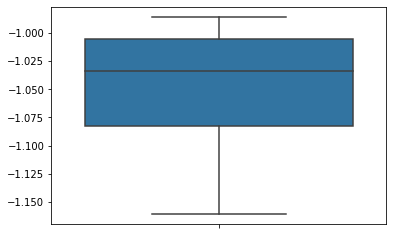

In [42]:
# make Box plot (apply filtering)
sns.boxplot(y=outliers_dectector_.negative_outlier_factor_[selected_indexs]);

In [46]:
# IQR 
IQR=threshold_range[1]-threshold_range[0]
# 0-Q and 4th-Q
# 0Q = 1Q - 1.5*IQR 
Q0=threshold_range[0]-1.5*IQR
# 4Q = 3Q + 1.5*IQR 
Q4=threshold_range[1]+1.5*IQR
# set extreme threshold value / range
xthreshold_range=[Q0,Q4]
# apply threshold range
selected_x_indexs=factor_[(factor_>xthreshold_range[0])].dropna()[factor_<xthreshold_range[1]].dropna().index

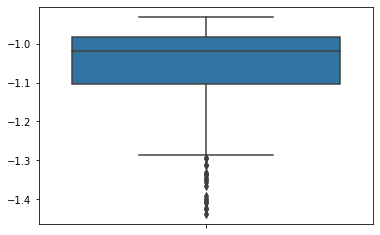

In [47]:
# make Box plot (apply extreme filtering)
sns.boxplot(y=outliers_dectector_.negative_outlier_factor_[selected_x_indexs]);